#                 Password Strength Checker with Machine Learning

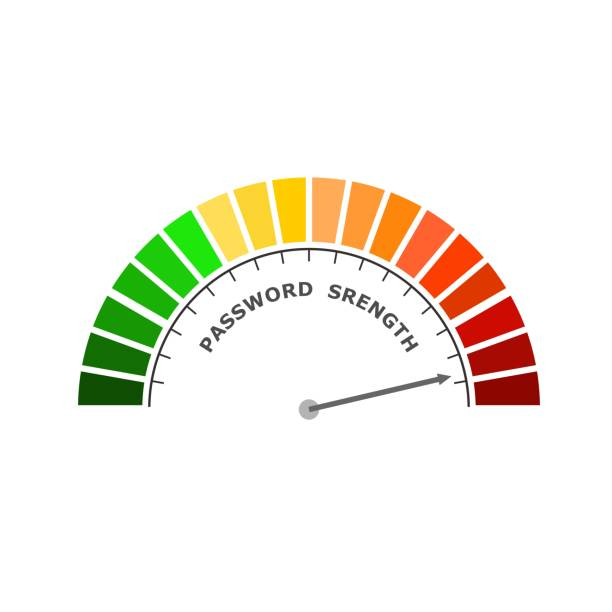

### Importing the necessary Python libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Importing  the dataset

In [55]:
data = pd.read_csv("data.csv", error_bad_lines=False)

C:\Users\INFO\AppData\Local\Temp\ipykernel_4532\840706980.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("data.csv", error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping

Skipping line 525174: expected 2 fields, saw 5
Skipping line 526251: expected 2 fields, saw 5
Skipping line 529611: expected 2 fields, saw 5
Skipping line 531398: expected 2 fields, saw 5
Skipping line 534146: expected 2 fields, saw 5
Skipping line 544954: expected 2 fields, saw 5
Skipping line 553002: expected 2 fields, saw 5
Skipping line 553883: expected 2 fields, saw 5
Skipping line 553887: expected 2 fields, saw 5
Skipping line 553915: expected 2 fields, saw 5
Skipping line 554172: expected 2 fields, saw 5
Skipping line 563534: expected 2 fields, saw 5
Skipping line 565191: expected 2 fields, saw 5
Skipping line 574108: expected 2 fields, saw 5
Skipping line 574412: expected 2 fields, saw 5
Skipping line 575985: expected 2 fields, saw 5
Skipping line 580091: expected 2 fields, saw 5
Skipping line 582682: expected 2 fields, saw 5
Skipping line 585885: expected 2 fields, saw 5
Skipping line 590171: expected 2 fields, saw 5
Skipping line 591924: expected 2 fields, saw 5
Skipping line

In [51]:
print(data.head())

      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1


In [52]:
data.shape

(669640, 2)

In [53]:
data.strength.unique()


array([1, 2, 0], dtype=int64)

###### The dataset has two columns, password and strength. In the strength column:

###### 0 means: the password’s strength is weak,
###### 1 means: the password’s strength is medium,
###### 2 means: the password’s strength is strong.

#### Before moving forward, I will convert 0, 1, and 2 values in the strength column to weak, medium, and strong:

In [56]:
data = data.dropna()

data["strength"] = data["strength"].map({0: "Weak", 
                                         1: "Medium",
                                         2: "Strong"})

In [57]:
print(data.sample(5))

                password strength
436246        za55124565   Medium
523413           w5on6gn     Weak
520384  lZfslxTIxNggJ0sv   Strong
656322         qifiso560   Medium
282520          magias21   Medium


In [39]:
#Function to tokenize the passwords
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

In [40]:
#split the data into training and test sets
x = np.array(data["password"])
y = np.array(data["strength"])

In [41]:
tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)

C:\Users\INFO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.05, random_state=42)

In [25]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [42]:
print(model.score(xtest, ytest))

0.9567827489397288


### Now here’s how we can check the strength of a password using the trained model:


In [48]:
user = input("Enter Password: ")
data = tdif.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter Password: anna@123
['Medium']


In [30]:
import getpass
user_password = getpass.getpass("Enter Password: ")
data = tdif.transform([user_password]).toarray()
output = model.predict(data)
print(output)

Enter Password: ········
['Weak']
